In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
   from google.colab import drive
   drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Body Fat percentage dataset/bodyfat.csv"  # Ensure the file is in the correct directory
df = pd.read_csv(file_path)

In [5]:
#Information on the body fat dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None


In [6]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [7]:
# Checking the dataset for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [8]:
# Summarising statistics of the dataset. Displaying the count of nun null values, mean, standard deviation and min/max values and quartiles.
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std   

In [9]:
# Correlation matrix
corr_matrix = df.corr()

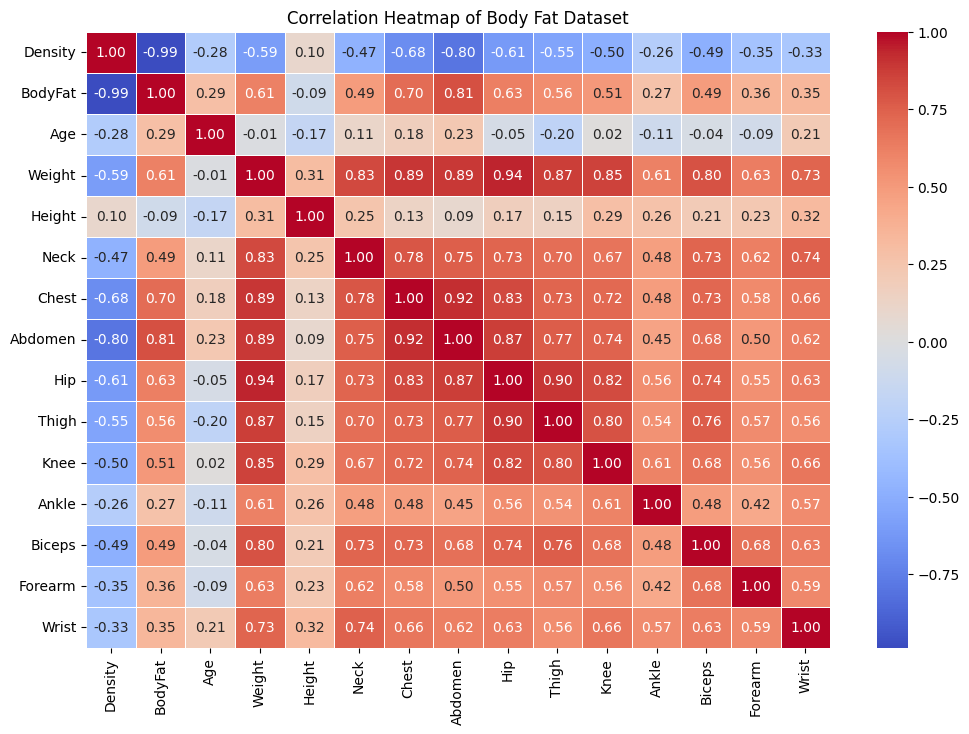

In [10]:
# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Body Fat Dataset")
plt.show()

In [11]:
# Selecting the top correlated features for visualisation
top_features = ["Abdomen", "Chest", "Hip", "Weight", "Thigh"]

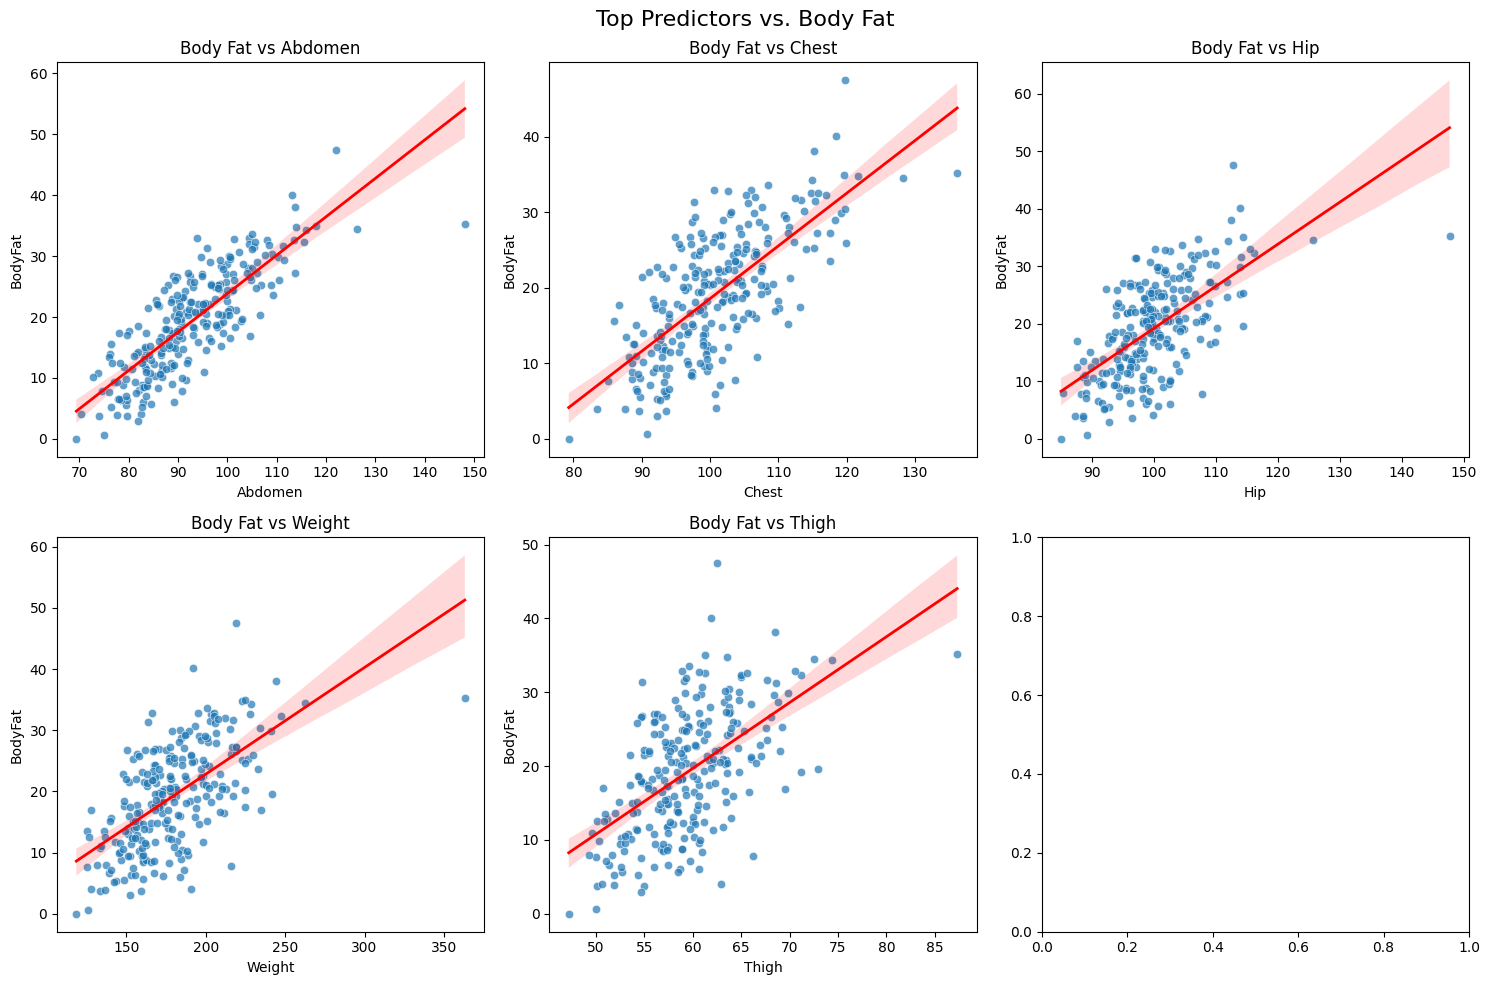

In [17]:
# Scatter plots to visualise the relationships with BodyFat
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Top Predictors vs. Body Fat", fontsize=16)
for i, feature in enumerate(top_features):
    row, col = divmod(i, 3)
    sns.scatterplot(ax=axes[row, col], x=df[feature], y=df["BodyFat"], alpha=0.7)
    sns.regplot(ax=axes[row, col], x=df[feature], y=df["BodyFat"], scatter=False, color="red", line_kws={"linewidth":2})
    axes[row, col].set_title(f"Body Fat vs {feature}")
    plt.tight_layout()
plt.show()

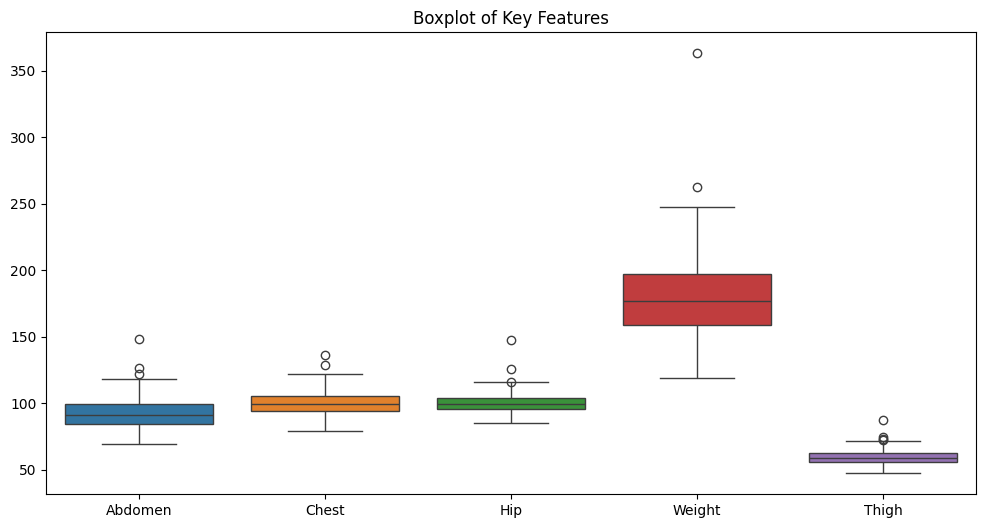

In [18]:
# Boxplot visualisation to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[top_features])
plt.title("Boxplot of Key Features")
plt.show()


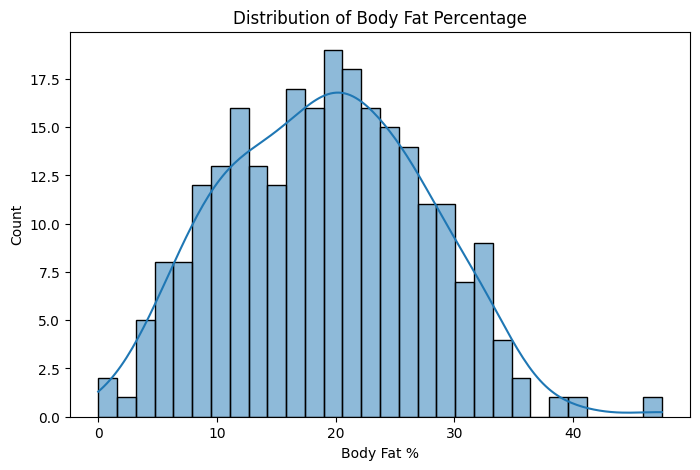

In [19]:
# Visualising the distribution of body fat percentage
plt.figure(figsize=(8, 5))
sns.histplot(df["BodyFat"], bins=30, kde=True)
plt.title("Distribution of Body Fat Percentage")
plt.xlabel("Body Fat %")
plt.ylabel("Count")
plt.show()

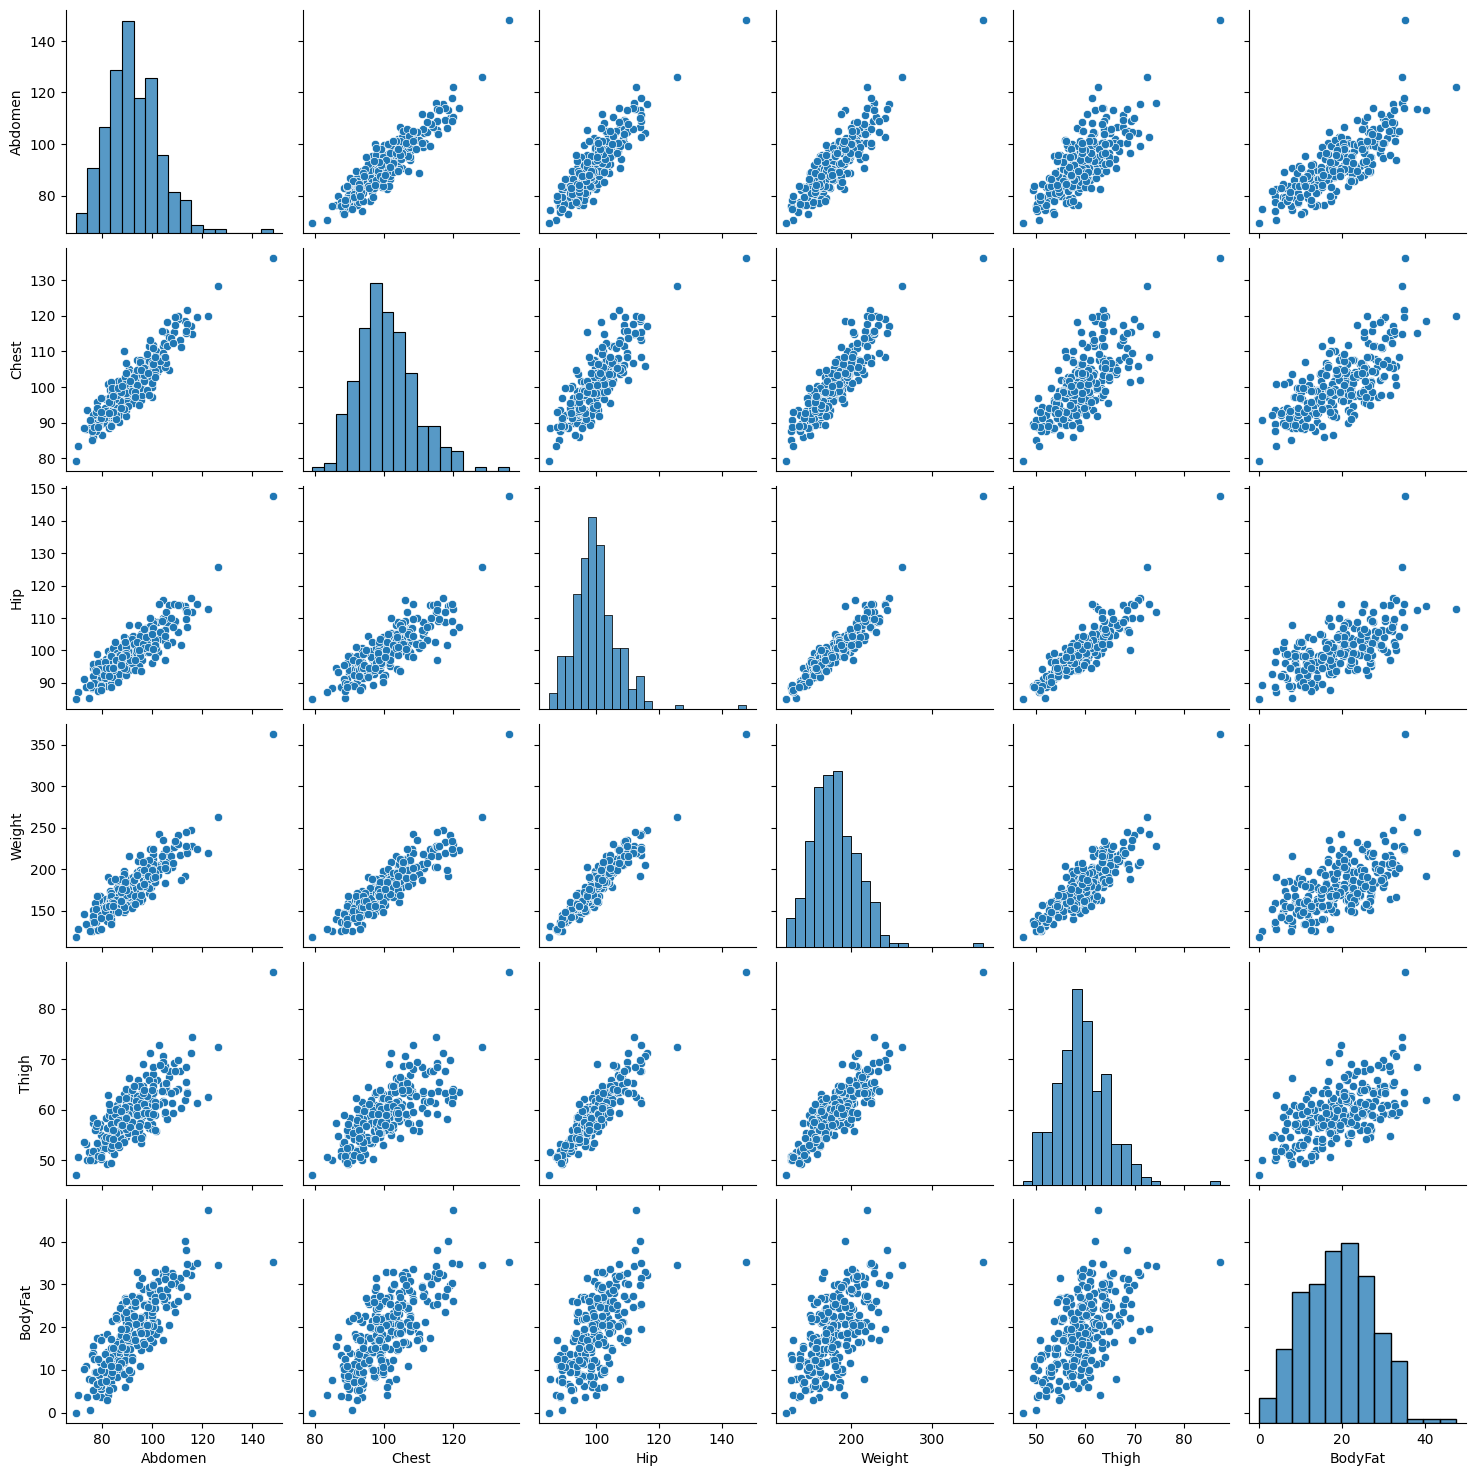

In [21]:
#Pairplot visualisation of the relationships between the features
sns.pairplot(df[top_features + ["BodyFat"]])
plt.show()


In [22]:
# Multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[top_features]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) for Multicollinearity Detection:")
print(vif_data)


Variance Inflation Factor (VIF) for Multicollinearity Detection:
   Feature          VIF
0  Abdomen   544.150228
1    Chest   727.043006
2      Hip  1201.937101
3   Weight   173.492965
4    Thigh   699.341014
